# Settings

This notebook illustrate the use of the climetlab settings.

The relevant Climetlab documentation is located at https://climetlab.readthedocs.io/en/latest/guide/settings.html

# How to run this exercise

This exercise is in the form of a [Jupyter notebook](https://jupyter.org/). It can be "run" in a number of free cloud based environments (see two options below). These require no installation. When you click on one of the links below ([`Open in Colab`](https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/02-settings-and-downloading.ipynb) or [`Launch in Deepnote`](https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/02-settings-and-downloading.ipynb)) you will be prompted to create a free account, after which you will see the same page you see here. You can run each block of code by selecting shift+control repeatedly, or by selecting the "play" icon. 

Advanced users may wish to run this exercise on their own computers by first installing [Python](https://www.python.org/downloads/), [Jupyter](https://jupyter.org/install) and [CliMetLab](https://climetlab.readthedocs.io/en/latest/installing.html).

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/02-settings-and-downloading.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
    <th><a href="https://deepnote.com/launch?url=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/02-settings-and-downloading.ipynb">
        <img src = "https://deepnote.com/buttons/launch-in-deepnote-small.svg" alt = "Kaggle"></th>
  </tr>
</table>

# Install CliMetLab

In [22]:
pip install climetlab --quiet

Note: you may need to restart the kernel to use updated packages.


# Accessing the settings

The settings can be accessed:
- Via python (using the climetlab API)
- Using the command line (``climetlab settings``)
- By editing the settings file (~/.climetlab/settings.yaml).

In [ ]:
!climetlab settings

In [ ]:
import climetlab as cml
cml.settings

In [ ]:
!cat ~/.climetlab/settings.yaml

In [26]:
cml.settings.reset()

As an example, here is how to tweak the number of download threads used by CliMetLab when downloading data from URLs:

Note that, contrary to what you could expect, in most cases, using 20 threads will not make your download 20 times faster. On the other hand, depending on your setup, using a few threads can be useful. It is recommended that you keep the default number of download threads. 

In [27]:
cml.settings.get('number-of-download-threads')

5

In [28]:
cml.settings.set('number-of-download-threads', 2)
cml.settings.get('number-of-download-threads')

2

Notice how you need to reload the python kernel if you use the command line interface or if you edit directly the settings file:

In [29]:
!climetlab settings number-of-download-threads

2


In [30]:
!climetlab settings number-of-download-threads 4

In [31]:
!climetlab settings number-of-download-threads

4


In [32]:
cml.settings.get('number-of-download-threads')

2

In [33]:
# After restarting the kernel
import climetlab as cml
cml.settings.get('number-of-download-threads')

2

# Parallel download example

In [ ]:
# WARNING: this cleans (i.e. DELETES) the whole climetlab cache.
# (The cache contains temporary files, with data that has already been downloaded, and could be reused)

# !climetlab decache --all # This cell is commented out to avoid cleaning the cache by mistake

In [35]:

!pip install climetlab-weatherbench --quiet

In [36]:
# This takes several minutes to run (140M to download).
import climetlab as cml
ds = cml.load_dataset("weatherbench", year = [2000, 2001], parameter = 'geopotential_500hPa')
ds.to_xarray()

  0%|          | 0/2 [00:00<?, ?it/s]

geopotential_500hPa_2000_5.625deg.nc:   0%|          | 0.00/68.7M [00:00<?, ?B/s]

geopotential_500hPa_2001_5.625deg.nc:   0%|          | 0.00/68.5M [00:00<?, ?B/s]

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 17544)
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
    level    int32 500
  * time     (time) datetime64[ns] 2000-01-01 ... 2001-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8784, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 21:48:53 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [37]:
import climetlab as cml 
# cml.cache

# Changing the default plotting settings

Change the CliMetLab settings to tweak it globally.

In [38]:
import climetlab as cml

In [39]:
# Reset all custom settings to default values
cml.settings.reset()
# Reset one given setting to default value
cml.settings.reset("plotting-options")

test.grib:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

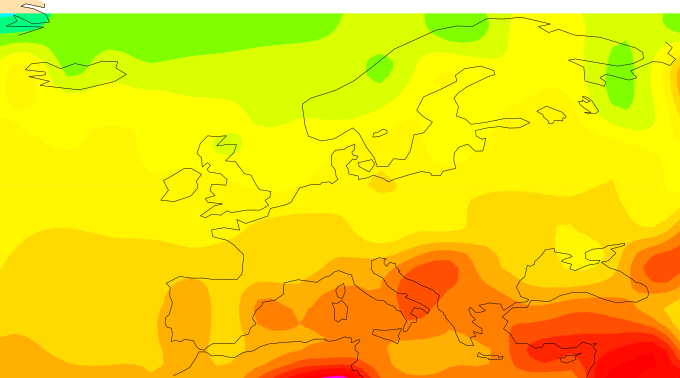

In [40]:
cml.settings.reset()
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
cml.plot_map(ds)

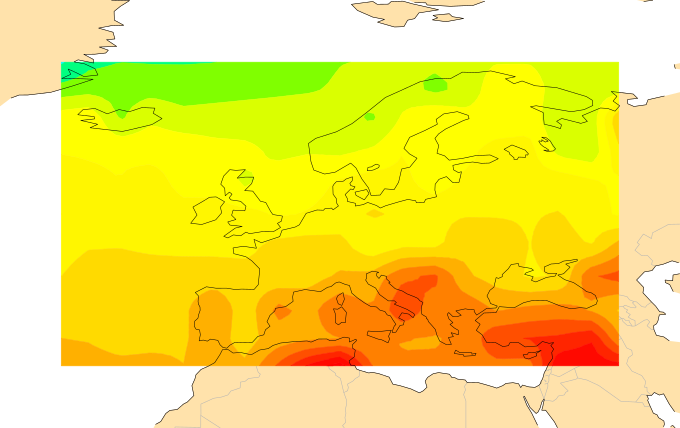

In [41]:
cml.settings.reset()
cml.plot_map(ds, margins ='10%')

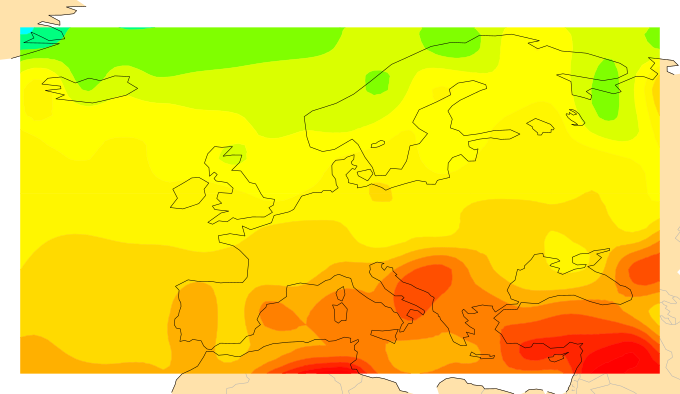

In [42]:
cml.settings.reset()
cml.settings.set("plotting-options", {"margins": 2})
cml.plot_map(ds)

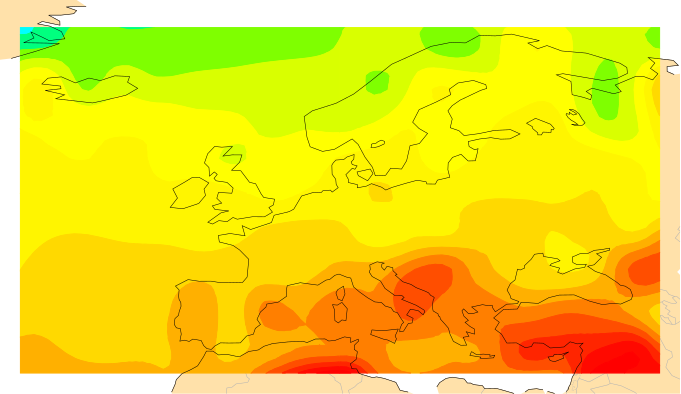

In [43]:
cml.settings.reset()
cml.settings.set("plotting-options", {"format": "svg", "margins": 2})
cml.plot_map(ds)

The parameters provided on the function itself takes precedence over the settings.

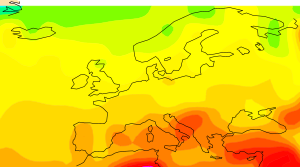

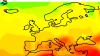

In [44]:
cml.settings.reset()
cml.settings.set("plotting-options", {"width": 300})
cml.plot_map(ds)
cml.plot_map(ds, width = 100)

# Temporary change of the settings (`with`)

Settings can also be changed with a context (using python `with`), in case the code cannot be changed directly in the call.

In [45]:
def visualisation_func(ds):
    # this function may belong to another package
    # ... lots of code ...
    # hidden somewhere, there is a call to climetlab
    m = cml.plot_map(ds) 
    # ... lots of code ...

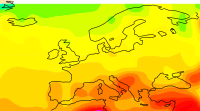

In [46]:
import climetlab as cml
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
with cml.settings.temporary("plotting-options", {"width": 200}):
    visualisation_func(ds)